## Observations and Insights 
1) Capomulin had the most mice survive through the last timepoint and had the lowest interquartile range of Tumor Volume, suggesting it worked the best of the Regimens.
    
2) There is a strong correlation between mouse weight and avgerage tumor volume for Capomulin.  This drug also had the second lowest mean weight of mice.  Perhaps further study with larger mice is necessary.

3) While overall the sex of mice was split close 50/50 the Capomulin skewed towards female at 55%.  Perhaps single sex studies are necessary to test the effectivness of Capomulin or reduce error.

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_complete = pd.merge(mouse_metadata, study_results, on=["Mouse ID", "Mouse ID"])
data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.15,2
1889,z969,Naftisol,Male,9,30,30,65.84,3
1890,z969,Naftisol,Male,9,30,35,69.18,4
1891,z969,Naftisol,Male,9,30,40,70.31,4


In [2]:
# Checking the number of mice in the DataFrame.

# There are 249 unique Mouse IDs....
print(f"There are {data_complete['Mouse ID'].nunique()} mice")
      
#...And 250 at Timepoint 0 (where I would expect all mice to be only once)
dups_df = data_complete.groupby('Timepoint').count()
dups_df.head(1)

There are 249 mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Timepoint,,,,,,,
0,250,250,250,250,250,250,250


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# g989 seems to have 2 mice....
countingmice = data_complete.groupby(by=['Mouse ID', 'Timepoint']).count()
countingmice.sort_values('Drug Regimen', ascending=False).head()

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
g989     20                    2    2           2           2   
         15                    2    2           2           2   
         10                    2    2           2           2   
         5                     2    2           2           2   
         0                     2    2           2           2   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
g989     20                          2                 2  
         15                          2                 2  
         10                          2                 2  
         5                           2                 2  
         0                           2                 2

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

#...She shows up for most (but not all) of the Timepoints
justg989 = data_complete.loc[data_complete['Mouse ID'] == 'g989', :]
justg989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Lets drop her (like my High School girlfriend dropped me)
Clean_data = data_complete.set_index('Mouse ID')
Clean_data = Clean_data.drop(['g989'])
Clean_data = Clean_data.reset_index(drop=False)
Clean_data
cop = Clean_data.loc[Clean_data['Drug Regimen'] == 'Capomulin', :]
cap = cop.groupby(by=['Sex']).count()
cap

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,128,128,128,128,128,128,128
Male,102,102,102,102,102,102,102


In [6]:
# Checking the number of mice in the clean DataFrame.

#There are now 248 unique mice by Mouse ID and 248 mice in Timepoint 0
print(f"There are now {Clean_data['Mouse ID'].nunique()} unique mice in the count of Mouse ID")
dups_df = Clean_data.groupby('Timepoint').count()
dups_df.head(1)

There are now 248 unique mice in the count of Mouse ID


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Timepoint,,,,,,,
0,248,248,248,248,248,248,248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

# I should have read the above before I tried 5 other things 

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen

#standard error of mean (SEM) did we cover that? I'm glad the internet told me pandas could do that
# individual series of each stat grouped by Drug Regimen then put in a summary data frame
mean = Clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = Clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var = Clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = Clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = Clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": var, "Standard Deviation": stdv,"SEM": sem})

#I also found a better way to format the entire dataframe (wish I knew this last week)
pd.options.display.float_format = '{:,.2f}'.format
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar Plots

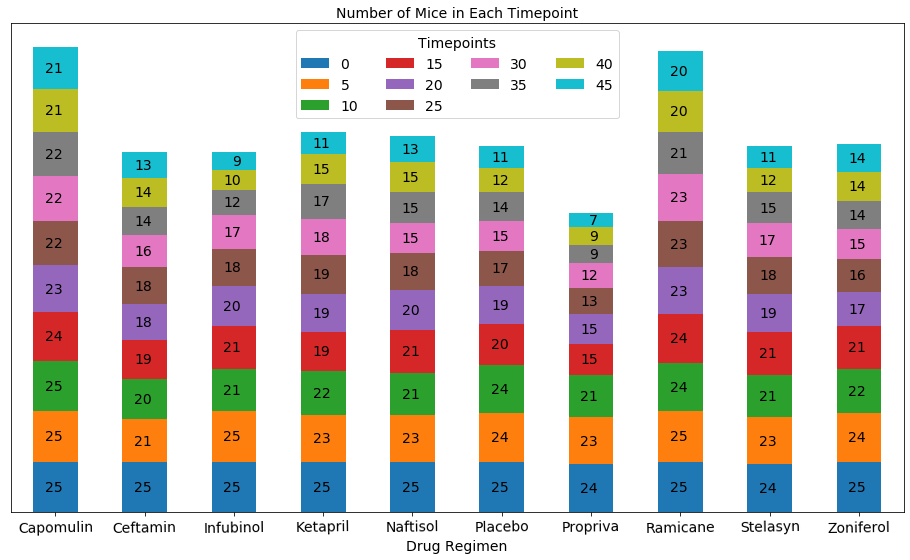

In [41]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the 
# course of the study using pandas. 

# dude this is the most convoluted... did we cover unstacked?  P.S. This table of data: 
# ("barbastard = Clean_data.groupby(['Drug Regimen', 'Timepoint']).size().unstack()") would be the easiest 
# and clearest way to present this data (please see Tufte)

# Also I worked with Adrienne and she helped me find unstack.  I found .size and that gets the correct number of 
# mice per Timepoint.  I was trying to build the table using .pivot (maybe I was successful below)
barchart = Clean_data.groupby(['Drug Regimen', 'Timepoint']).size().unstack().plot(kind='bar'
            ,stacked=True,figsize=(16,9),rot=1, fontsize=14)
# if the above isn't plotted like it is then the labels below don't work

plt.title("Number of Mice in Each Timepoint", fontsize=14)
plt.xlabel("Drug Regimen", fontsize=14)
plt.yticks([])
plt.legend(loc=9,ncol=4,title="Timepoints",fontsize=14,title_fontsize=14)
# the below adds the values (count of mice) to each of the Timepoints (colors) for each of the Drugs (Bars)
# I got this from the internet, I understand it now but did not create it myself.  
# (https://stackoverflow.com/questions/60875468/how-to-add-labels-to-stacked-bar-more-than-2-stacks-chart-in-pandas) 
for rect in barchart.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    # The width of the bar is the data value and can be used as the label
    label_text = f'{int(height)}' 
    label_x = x + width - 0.17
    label_y = y + height / 2
    barchart.text(label_x, label_y, label_text, ha='right', va='center', fontsize=14)    

# God Damn.  OR I PUT THE DATA IN CSV OPEN IN EXCEL AND CHART IN 5 MINUTES

Timepoint     0   5   10  15  20  25  30  35  40  45
Drug Regimen                                        
Capomulin     25  25  25  24  23  22  22  22  21  21
Ceftamin      25  21  20  19  18  18  16  14  14  13
Infubinol     25  25  21  21  20  18  17  12  10   9
Ketapril      25  23  22  19  19  19  18  17  15  11
Naftisol      25  23  21  21  20  18  15  15  15  13
Placebo       25  24  24  20  19  17  15  14  12  11
Propriva      24  23  21  15  15  13  12   9   9   7
Ramicane      25  25  24  24  23  23  23  21  20  20
Stelasyn      24  23  21  21  19  18  17  15  12  11
Zoniferol     25  24  22  21  17  16  15  14  14  14


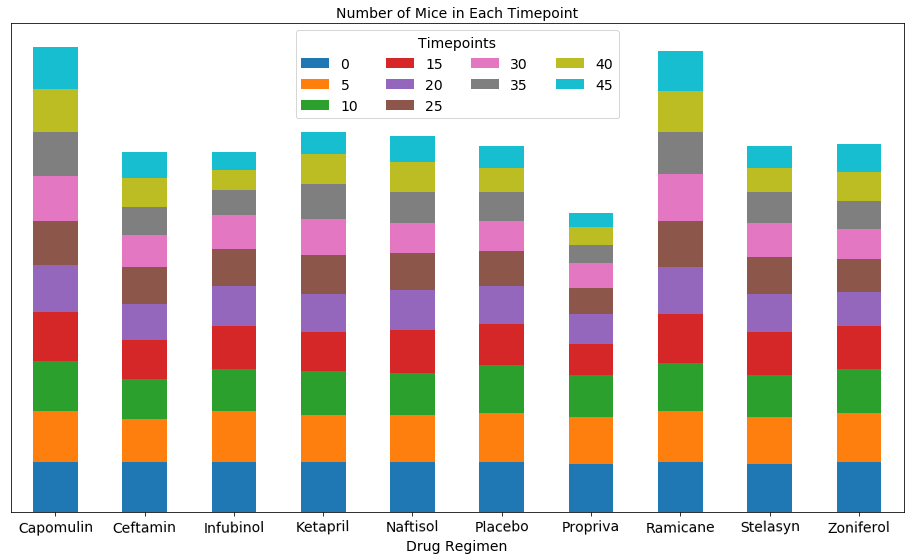

In [48]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the 
# study using pyplot.

# maybe just use this table, I am sick of this bar chart
MathP = Clean_data.groupby(['Drug Regimen', 'Timepoint']).size().unstack()
print(MathP)

# I truly ran out of time (and patience) on this part of the Homework.  Here is another barchart.  I willing to take an A instead of an A+ :)
# (Honestly I worked on this for a day and couldn't get it to work, i'm not really giving up, I just have to move on)
Hate = Clean_data[["Drug Regimen", "Timepoint", "Mouse ID"]]
Hate.groupby(['Drug Regimen','Timepoint']).size().unstack().plot(kind='bar',stacked=True,figsize=(16,9),rot=1, fontsize=14)
plt.yticks([])
plt.title('Number of Mice in Each Timepoint',fontsize=14)
plt.legend(loc=9,ncol=4,title="Timepoints",fontsize=14,title_fontsize=14)
plt.xlabel("Drug Regimen", fontsize=14)
plt.show()

## Pie Plots

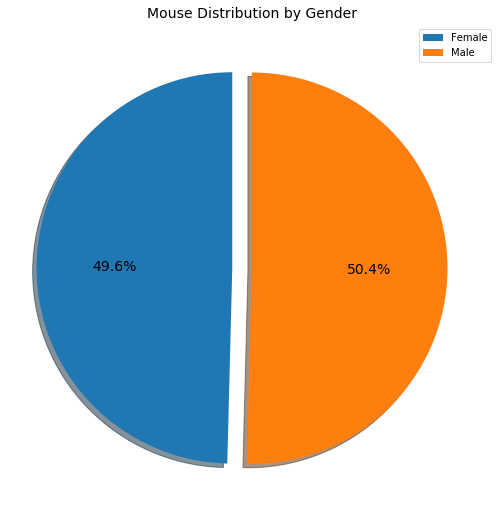

In [665]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Gender = Clean_data.groupby('Sex')['Mouse ID'].nunique()
gender_plot = Gender.plot(kind='pie', explode=[0.1,0],autopct="%1.1f%%",shadow=True, startangle=90,labels=None,
                          legend=True,figsize=(16,9), fontsize=14)
plt.title("Mouse Distribution by Gender", fontsize=14)
gender_plot.set_ylabel("")
plt.show()

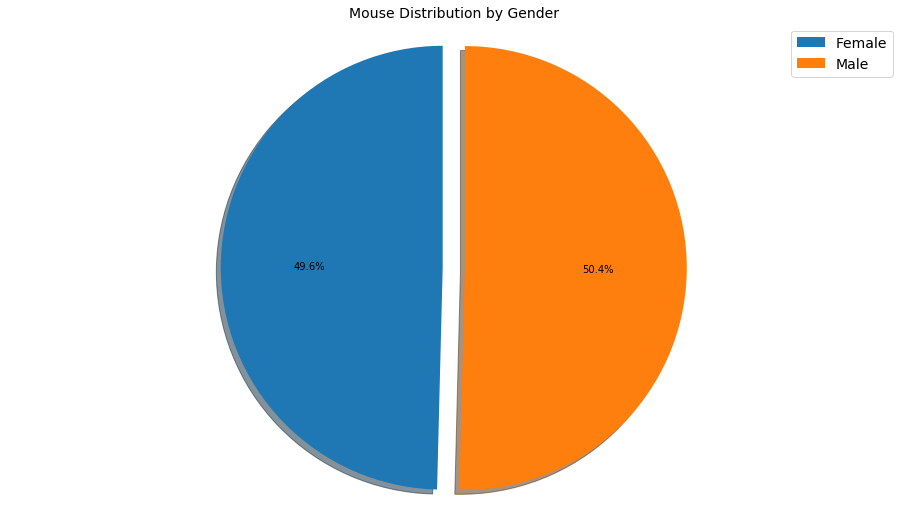

In [674]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode = (0.1, 0)
labels = ["Female", "Male"]
plt.pie(Clean_data.groupby('Sex')['Mouse ID'].nunique(),explode=explode,startangle=90,autopct="%1.1f%%", shadow=True)
plt.title("Mouse Distribution by Gender",fontsize=14)
plt.axis("equal")
plt.legend(labels,fontsize=14,loc="best")
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

## Quartiles, Outliers and Boxplots

Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [594]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# I did this all wrong originally.  I'm removed and re-used some of that code, I hope my annotations make sense
# (The instructions in readme and here differed, readme gave the drugs but I didn't see that.  A LOT of Wasted time.
# I added the text above from the readme)

# summary_df from above shows the measures of central tendency for each regimen by Tumor Volume
# sorting this by mean(?) for the 4 most promising.(originally I ran a Histogram of mean tumor size)

# top 4 Drugs (originally I thought I was figuring the Drugs myself and used 'mean'. 'SEM' gives the 4 requested in readme
Top_temp = summary_df.sort_values('SEM') 
Top_4 = Top_temp.iloc[:4]
names = Top_4.reset_index()         
Regimen = names['Drug Regimen'].to_list()          

# Okay, using the list "Regimen" I am creating a dataframe of just the top 4 drugs.  
# Holy Cow .isin!!!!!!!!!!! Do you know the convoluted garbage I was doing before I found this!  Hours wasted!
tumor_vol = Clean_data[Clean_data['Drug Regimen'].isin(Regimen)]

# removing duplicate mice from list should give me the last time point for each mouse(so long to get here)
# I spent a lot of time trying to get the last point for each mouse and went down a rabit hole of just timepoint 45 
# I also feel like I could have used drop_duplicates in the Pandas HW.  And "keep=last" messed with me for a bit
# I used this to spot check if a mouse showed up in more than one timepoint (after the code directly below)
# "onemouse = tumor_vol.loc[tumor_vol['Mouse ID'] == 'k403', :]" Just change the mouse id
tumor_vol = tumor_vol.drop_duplicates(subset='Mouse ID', keep='last')

# Now, if I loop through the drugs I can print all of the info for each.  And oh yeah data for boxplot in boxplotmaybe
# I grabbed most of this from the class files
boxplotmaybe = []
for drug in Regimen:
    promising = tumor_vol.loc[(tumor_vol['Drug Regimen'] == drug), :]
    quartiles = promising['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Drug Regimen: {drug}")
    print(f"The lower quartile Tumor Volume is: {round(lowerq,2)}")
    print(f"The upper quartile of Tumor Volume is: {round(upperq,2)}")
    print(f"The interquartile range of Tumor Volume is: {round(iqr,2)}")
    print(f"The the median of Tumor Volume is: {round(quartiles[0.5],2)} ")
    print(f"Tumors below {round(lower_bound,2)}(mm3) could be outliers.")
    print(f"Tumors above {round(upper_bound,2)}(mm3) could be outliers.")
    print('')
    # data for the boxplot below
    boxplotmaybe.append(promising['Tumor Volume (mm3)'])

Drug Regimen: Ramicane
The lower quartile Tumor Volume is: 31.56
The upper quartile of Tumor Volume is: 40.66
The interquartile range of Tumor Volume is: 9.1
The the median of Tumor Volume is: 36.56 
Tumors below 17.91(mm3) could be outliers.
Tumors above 54.31(mm3) could be outliers.

Drug Regimen: Capomulin
The lower quartile Tumor Volume is: 32.38
The upper quartile of Tumor Volume is: 40.16
The interquartile range of Tumor Volume is: 7.78
The the median of Tumor Volume is: 38.13 
Tumors below 20.7(mm3) could be outliers.
Tumors above 51.83(mm3) could be outliers.

Drug Regimen: Ceftamin
The lower quartile Tumor Volume is: 48.72
The upper quartile of Tumor Volume is: 64.3
The interquartile range of Tumor Volume is: 15.58
The the median of Tumor Volume is: 59.85 
Tumors below 25.36(mm3) could be outliers.
Tumors above 87.67(mm3) could be outliers.

Drug Regimen: Infubinol
The lower quartile Tumor Volume is: 54.05
The upper quartile of Tumor Volume is: 65.53
The interquartile range of

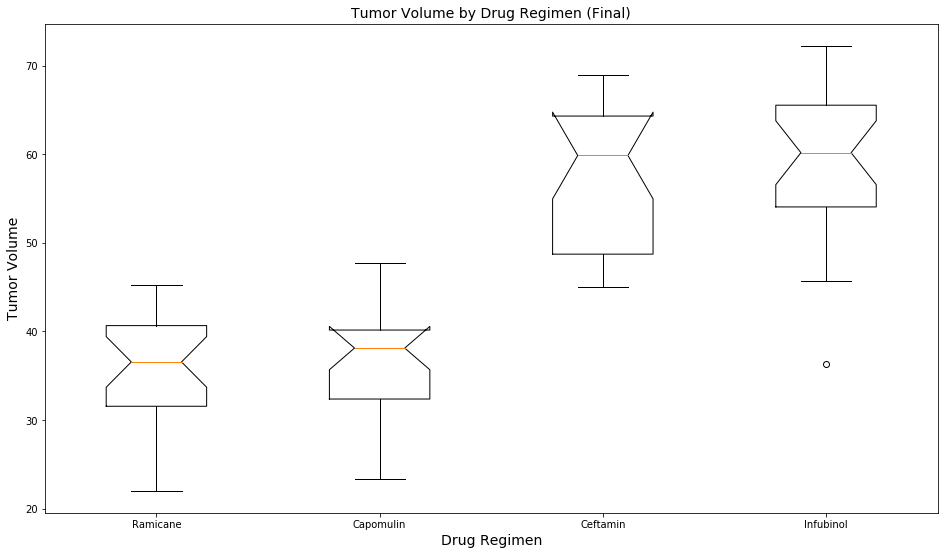

In [677]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax = plt.subplots(figsize=(16,9))
ax.set_title('Tumor Volume by Drug Regimen (Final)',fontsize=14)
ax.set_xlabel('Drug Regimen',fontsize=14)
ax.set_ylabel('Tumor Volume' ,fontsize=14)
ax.boxplot(boxplotmaybe, manage_ticks=True, notch=True, labels = Regimen)
plt.show()
# I have no idea how I got here.  Frankly I'm shocked I got it to work.  The linked page from the readme helped and the 
# class files.  I get the labels & title but how did I get from the list of final tumor sizes (boxplotmaybe) to here?
# figsize was a shot in the dartk.  Most other formatting came from the docs

## Line and Scatter Plots

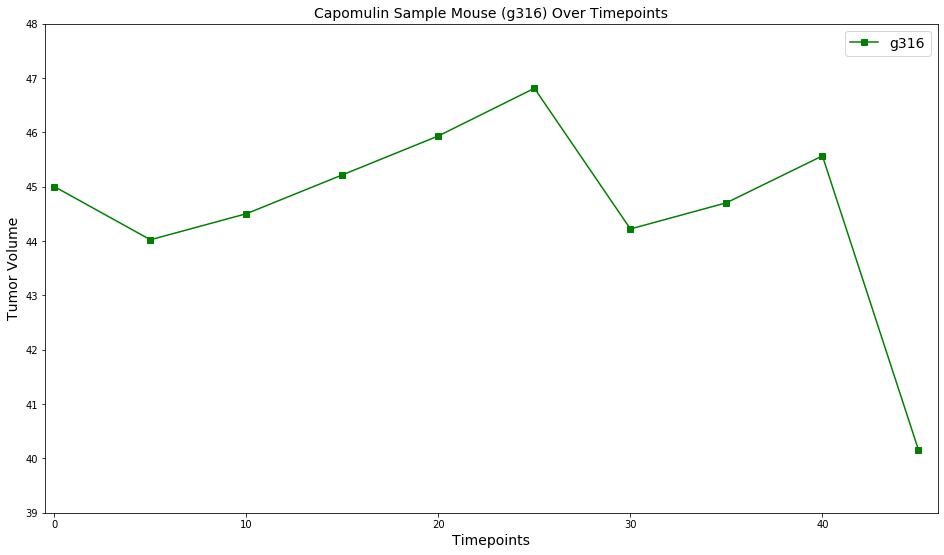

In [682]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# only the Capomulin mice (230 of them) I picked one that made it to Timepoint 45 (g316)
# I deleted the code I used to check this.
justg316 = Clean_data.loc[Clean_data['Mouse ID'] == 'g316', :]

#plotting her Tumor Volume over the study's Timepoints
Capomulin_gal, = plt.plot(justg316['Timepoint'], justg316['Tumor Volume (mm3)'],marker="s", color="g",label="g316")
plt.title("Capomulin Sample Mouse (g316) Over Timepoints", fontsize=14)
plt.xlabel("Timepoints", fontsize=14)
plt.ylabel("Tumor Volume", fontsize=14)
plt.xlim(-.5,46)
plt.ylim(39,48)
plt.legend(loc="best", fontsize=14)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

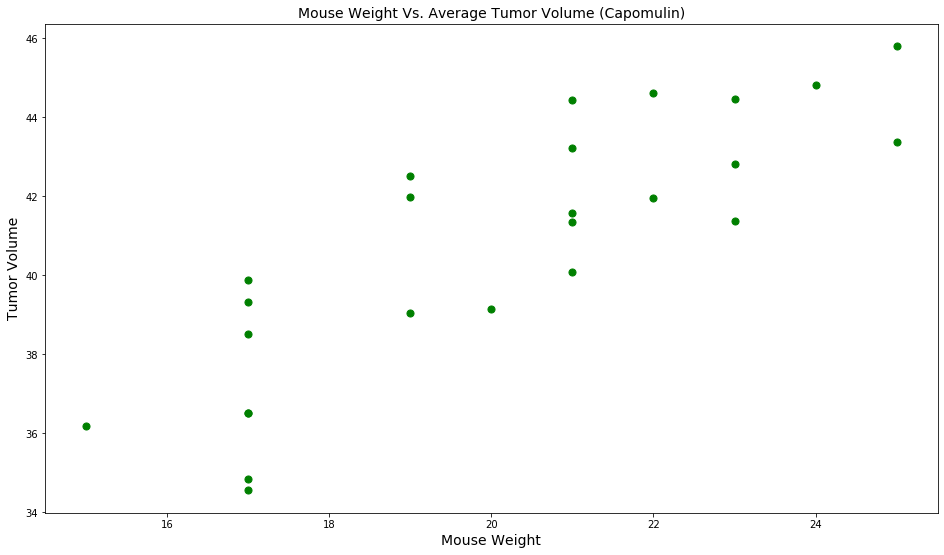

In [683]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# All of the Capomulin data
Capomulin = Clean_data.loc[Clean_data['Drug Regimen'] == 'Capomulin', :]

# using variables this time
# the avg weight of the mice (by Mouse) in the Capomulin study (honestly because the chart below didn't work with anything else)
mices_girth = Clean_data.groupby(Capomulin['Mouse ID'])['Weight (g)'].mean()
# the avg volume of the tumors (by Mouse) in the Capomulin study
tumor_girth = Clean_data.groupby(Capomulin['Mouse ID'])['Tumor Volume (mm3)'].mean()

plt.scatter(mices_girth, tumor_girth, marker="o", facecolors="g", s=50)
plt.title("Mouse Weight Vs. Average Tumor Volume (Capomulin)", fontsize=14)
plt.xlabel("Mouse Weight", fontsize=14)
plt.ylabel("Tumor Volume", fontsize=14)
plt.rcParams["figure.figsize"] = [16,9]

plt.show()

## Correlation and Regression

The correlation between mouse weight and avgerage tumor volume is 0.84


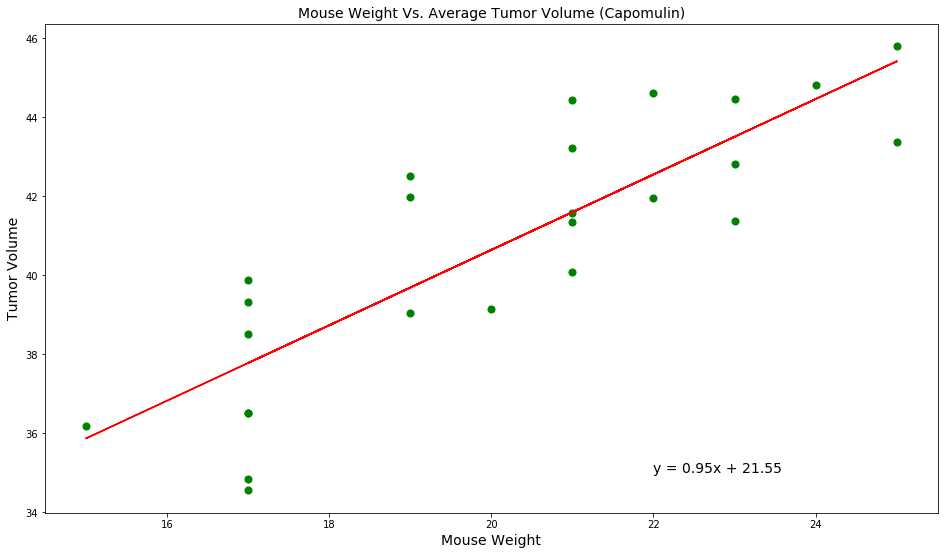

In [684]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# cribbed from class work

correlation = st.pearsonr(mices_girth,tumor_girth)
print(f"The correlation between mouse weight and avgerage tumor volume is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(mices_girth, tumor_girth)

regress_values = mices_girth * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(mices_girth, tumor_girth, marker="o", facecolors="g", s=50)
plt.plot(mices_girth,regress_values,"r-")
plt.annotate(line_eq,(22,35),fontsize=14,color="black")
plt.title("Mouse Weight Vs. Average Tumor Volume (Capomulin)", fontsize=14)
plt.xlabel("Mouse Weight", fontsize=14)
plt.ylabel("Tumor Volume", fontsize=14)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()